Slope of fitted graph:  -2.60205999133


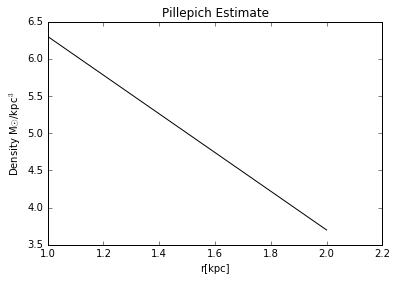

In [19]:
%matplotlib inline 
import matplotlib.pyplot as plt
import numpy as np
#plt.rc('text', usetex=True)
plt.plot(np.log10([10**1,10**2]), np.log10([2*10**6, 5*10**3]), c='k')
plt.ylabel('Density M$\odot$/kpc$^3$')
plt.xlabel('r[kpc]')

m=(np.log10(2*10**6)-np.log10(5*10**3))/(np.log10(10)-np.log10(10**2))
print('Slope of fitted graph: ', m)
plt.title('Pillepich Estimate')
plt.show()

In [172]:
import astropy.table as table 
indir='/Users/amandanewmark/Downloads/'
fh=open(indir+'mstar_dens_pillepich.txt')
x = []
for line in fh.readlines():
    y = [value for value in line.split()]
    x.append( y )

fh.close()


rad=[]
lumd=[]
for i in range(0, len(x)):
    x0=float(x[i][0])
    x1=float(x[i][1])
    rad.append(x0)
    lumd.append(x1)
rad=np.array(rad)
lumd=np.array(lumd)

maxL=np.max(lumd)
r12=26 #15 #26.56     #small=24, large=28
rvir=68#526 #68.57   #small=10, large=70
error=np.ones((len(rad)))
print(rad)
rcut=rad[(rad>=r12)&(rad<=rvir)]
lumcut=lumd[(rad>=r12)&(rad<=rvir)]
errcut=error[(rad>=r12)&(rad<=rvir)]
def my_linregress3(x,y,err):	#This one works!
	import numpy as np
	import math
	import scipy.stats as stats
	import scipy.optimize as opt
	#print('My linear regression!')
	N=len(x)
	Sigma = err**2*np.eye(N)
	Ah = np.vstack([x, np.ones(len(x))]).T
	Ae=np.dot(Ah.T, np.dot(np.linalg.inv(Sigma), Ah))
	be=np.dot(Ah.T, np.dot(np.linalg.inv(Sigma), y))### or y.T
	huh=np.linalg.lstsq(Ae, be)[0]
	slope=huh[0]
	inter=huh[1]
	S = np.linalg.inv(Ae)
	slope_err=np.sqrt(S[0,0])
	return slope, inter, slope_err

rcut=np.log10(rcut)
ldcut=np.log10(lumcut)
sl3, C3, std_err3=my_linregress3(rcut, ldcut, errcut)

[   5.0879    7.515    10.017    12.3      14.796    18.929    22.307
   24.718    27.39     32.279    40.456    52.83     60.994    68.989
   78.032    90.091   104.01    117.65    127.71    141.52    156.82
  170.24    177.37    196.55    213.37    222.31    241.33    267.42
  278.63  ]


Error is  0.0945779275254
[ 5.51620696  5.30993662  5.02635303  4.69119378  4.51072323]
$m_R = M_Q + DM + K_{QR}$


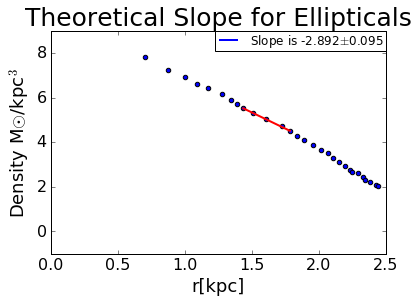

In [188]:
from my_style import get_presentation
get_presentation()
lograd=np.log10(rad)
loglum=np.log10(lumd)

err=np.std([-2.779, -2.985, -2.961, -2.908, -2.915, -2.77, -3.03, -3.025])
print('Error is ', err)

y=sl3*rcut+C3
print(y)
plt.scatter(lograd, loglum)
plt.plot(rcut, y, c='r')
plt.plot(0,0,label='Slope is '+str(np.round(sl3,3))+'$\pm$'+str(np.round(err,3)))
plt.ylabel('Density M$\odot$/kpc$^3$')
plt.xlabel('r[kpc]')
plt.title('Theoretical Slope for Ellipticals', fontsize=25)
plt.xlim(0,2.5)
plt.legend(loc=0)

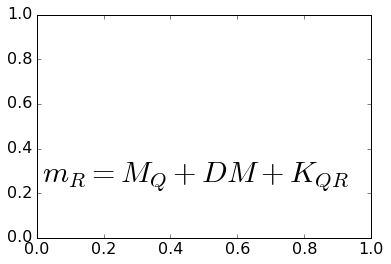

In [198]:
f=plt.figure()
plt.text(.015,0.25, r'$m_R = M_Q + DM + K_{QR}$', fontsize=30)

In [118]:
import astropy.table as table 
indir='/Users/amandanewmark/repositories/galaxy_dark_matter/GAH/'
bigdata = table.Table.read(indir+ 'LOWZ_HSCGAMA15_apmgs+cmodmag.fits')
print(bigdata['DEC'][1:10])

bigdata[['RA', 'DEC']].write('file.csv')

     DEC      
--------------
-2.02979606758
-1.56056045924
-1.49409512166
-1.72636025993
 -1.5068636764
  -1.571278805
-1.56177778266
-1.49249337305
-1.82517659659
